In [1]:
import pickle
from tqdm import tqdm
from statistics import mode
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from matplotlib.colors import LinearSegmentedColormap

In [73]:
with open("results_p1.txt", "rb") as fp:   # Unpickling
    data_p1 = pickle.load(fp)
    
with open("results_p2.txt", "rb") as fp:   # Unpickling
    data_p2 = pickle.load(fp)
        
    
data = data_p1 + data_p2 
total_utt = sum(len(x) for x in data)
print('Number of dialogues:', len(data))
print('Number of utterances:', total_utt)

Number of dialogues: 36318
Number of utterances: 3010296


Total positive podcast dialogues: 34764
Total negative podcast dialogues: 1554


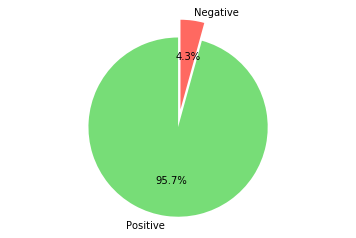

In [93]:
# get total sentiment of dialogues (positive or negative)
def dialogue_sentiments(sentiment_data):
    sentiments = []
    for d in sentiment_data:
        try:
            sentiments.append(mode(d))
        except:
            # in case of equal counts, choose negative
            sentiments.append(0)
    return sentiments
    
sents = dialogue_sentiments(data) 

pos_count = sents.count(1)
neg_count = sents.count(0)

pos_perc = pos_count/len(sents)*100
print('Total positive podcast dialogues:', pos_count)
print('Total negative podcast dialogues:', neg_count)


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive', 'Negative'
myColors = ((0.467, 0.867, 0.467, 1.0), (1.0, 0.412, 0.38, 1.0))
sizes = [pos_count, neg_count]
 # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=[0.1, 0.1], autopct='%1.1f%%',
        shadow=False, startangle=90, colors = myColors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [79]:
# pattern +++ = [1, 1, 1], +-+ = [1, 0, 1]
# Count sentiment patterns within podcasts
def pattern_occurences(sentiment_data, pattern):
    p_counts = []
    for d in tqdm(sentiment_data):
        c = sum(1 for i in range(len(d)) if d[i:i+len(pattern)]==pattern)
        p_counts.append(c)
    return p_counts
            
pattern_occ = pattern_occurences(data, [1, 0])   
print('Total amounts of pattern x in dataset: ', sum(pattern_occ))

100%|██████████| 36318/36318 [00:00<00:00, 44067.01it/s]

Total amounts of pattern x in dataset:  500643


In [94]:
# get length of longest sequence of positive utterances and longest sequence of negative utterances of a dialogue
def longest_sequence(sentiment_data, sentiment):
    """
    s: sentiment
    """
    longest = []
    for d in tqdm(sentiment_data):
        c, max_val = 0, 0
        for s in d: 
            # add to or reset running count
            c = c + 1 if s == sentiment else 0 

            # add to or reset running count
            max_val = max(c, max_val) 
        longest.append(max_val)

    return longest  
    
max(longest_sequence(data, 0))

100%|██████████| 36318/36318 [00:00<00:00, 44028.34it/s]


32

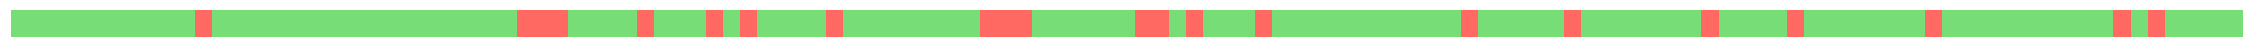

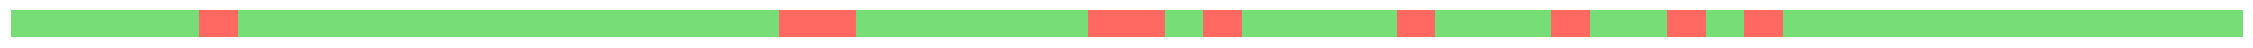

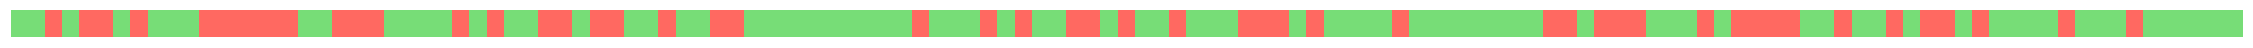

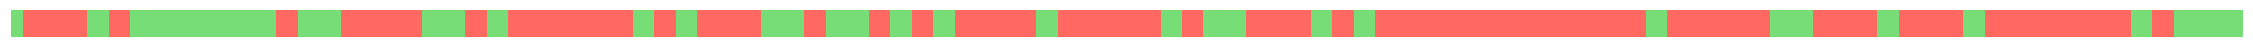

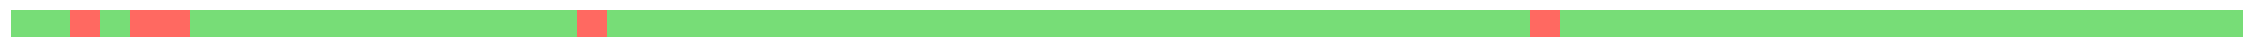

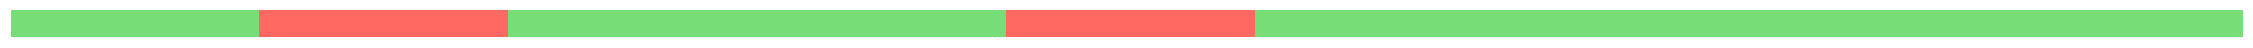

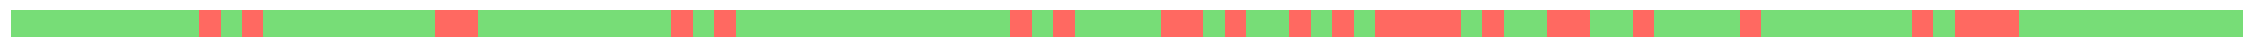

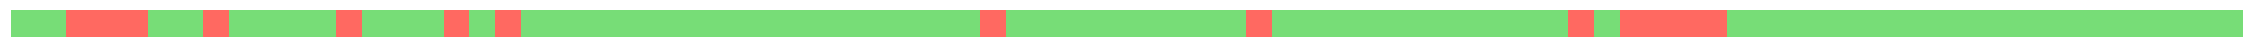

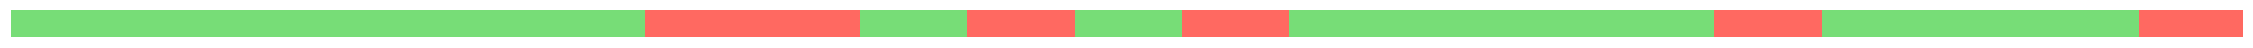

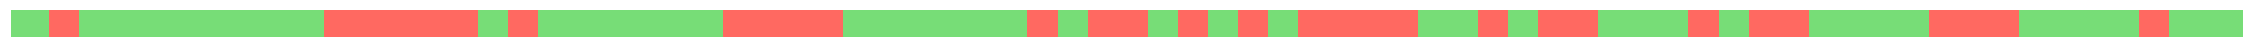

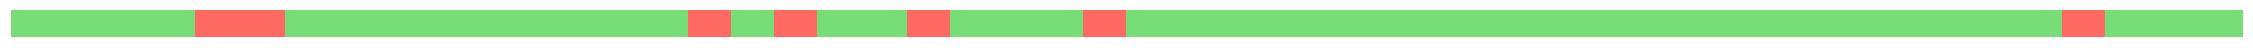

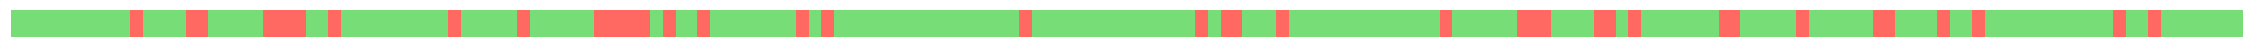

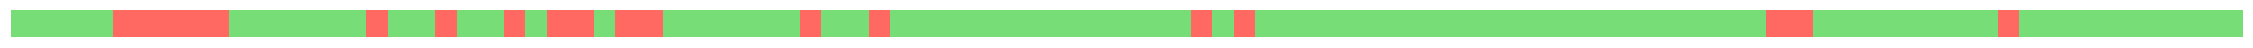

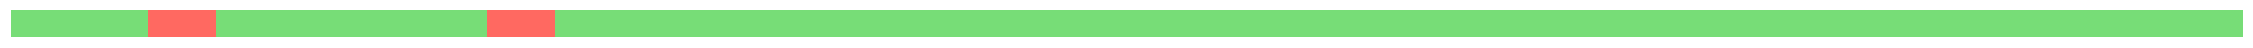

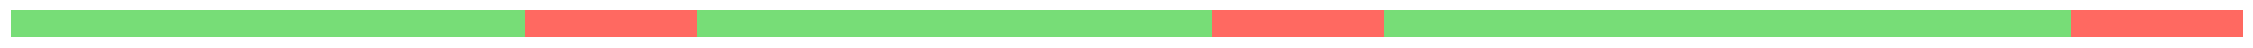

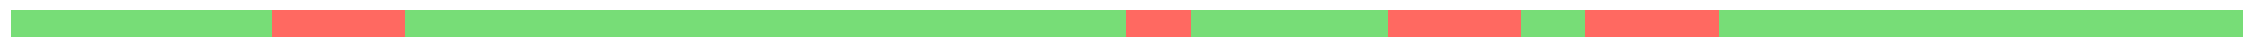

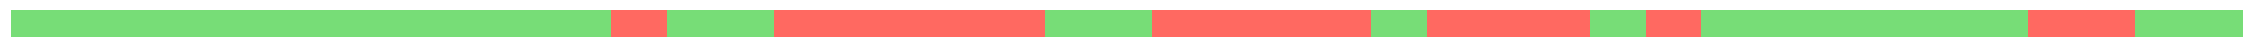

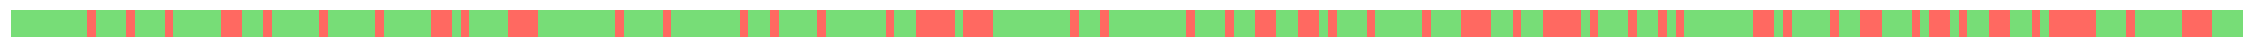

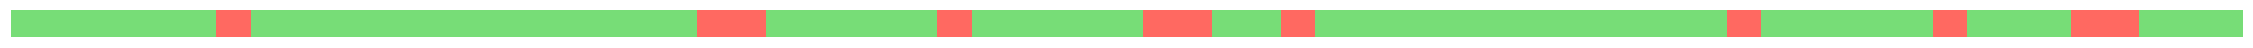

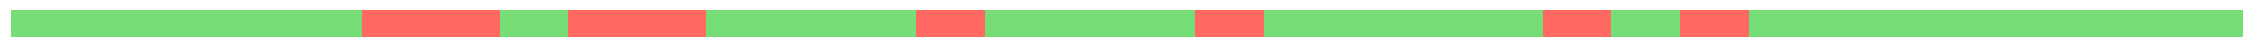

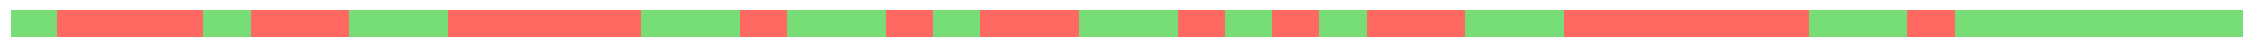

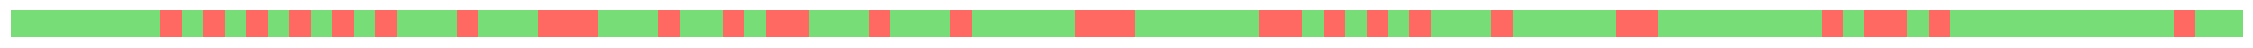

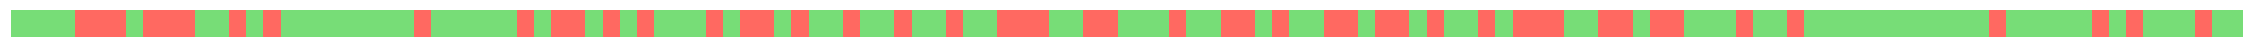

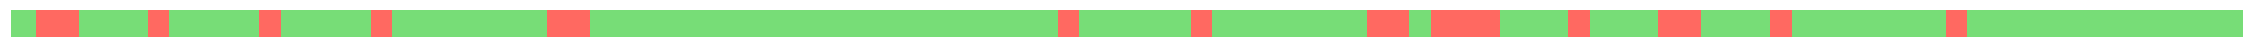

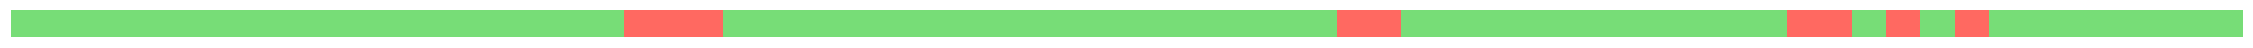

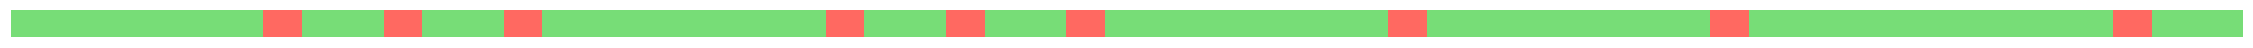

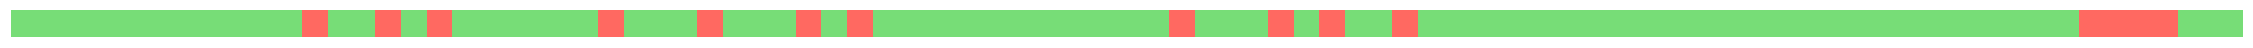

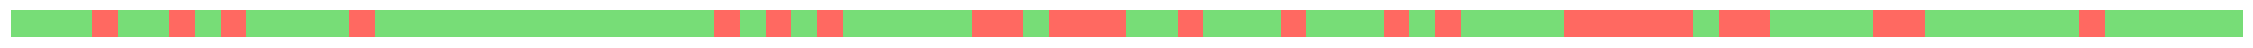

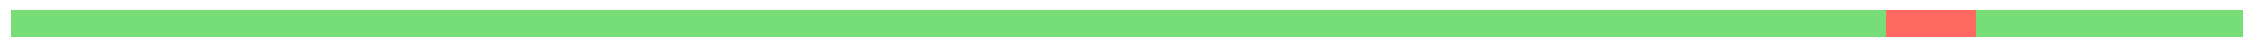

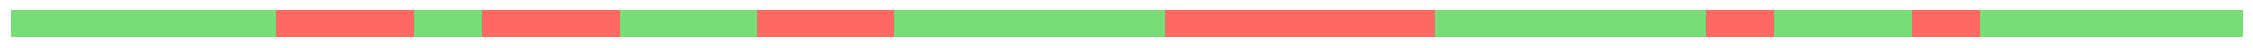

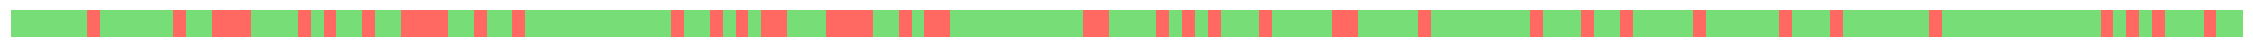

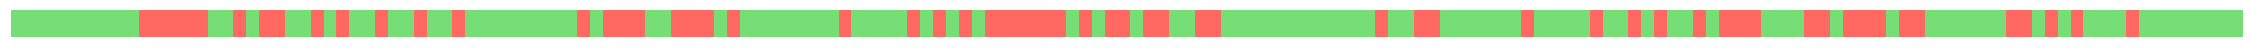

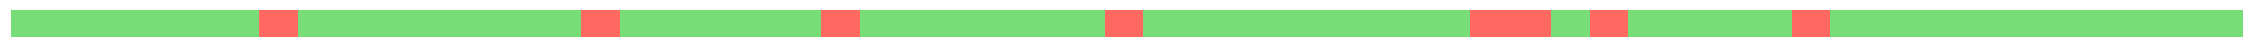

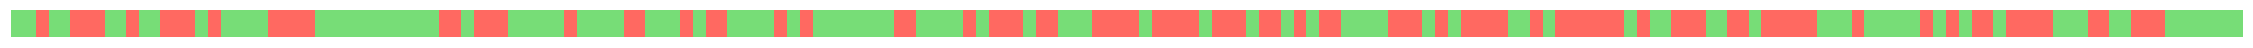

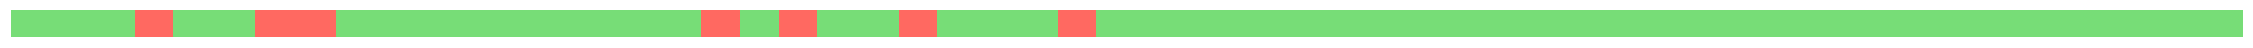

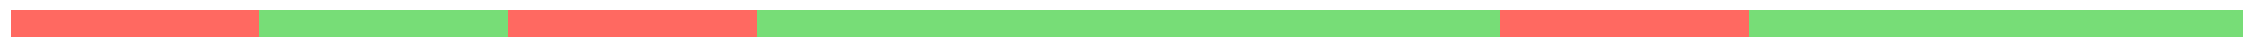

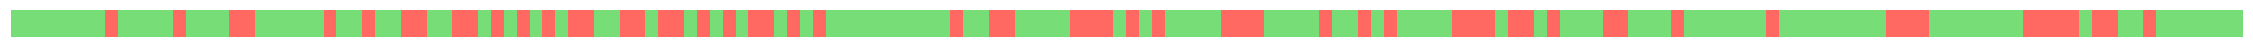

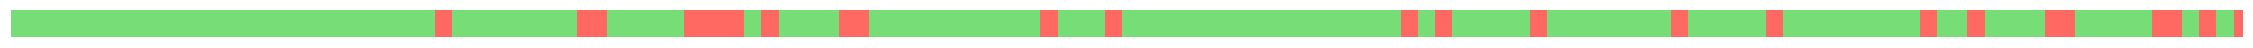

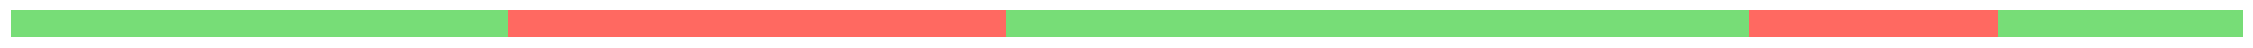

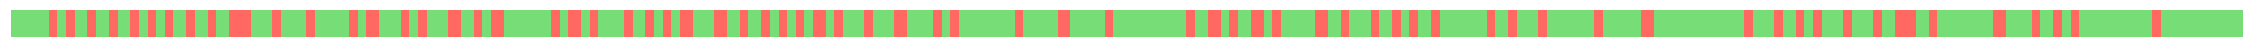

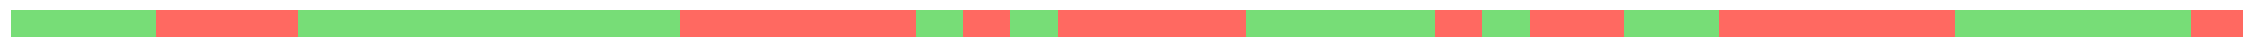

In [82]:
# show a sentimennt visualization of sample at index
def sentiment_progress_visualize(sentiment_data, i):
  
    x = sentiment_data[i]
    fig, ax = plt.subplots(figsize=(40,0.5))
    myColors = ((1.0, 0.412, 0.38, 1.0), (0.467, 0.867, 0.467, 1.0))
    cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
    plt
    seaborn.heatmap([x], square=False, xticklabels=False, yticklabels=False ,cmap=cmap, cbar=False)
    

# visualize
for i in range(len(data)):
    print(i)
    sentiment_progress_visualize(data, i)    
    if i == 40:
        break

In [81]:
# Helper function to segment a list in a list of sublists containing repetitive sequences in the list
def segment_seqs(x):
    if not x:
        return []
    result = [[x[0]]]
    j = 0
    for i in range(1, len(x)):
        if x[i] != x[i - 1]:
            result.append([])
            j += 1
        result[j].append(x[i])
        
    return result

def scale_data(sentiment_data):
    
    max_len = max([len(i) for i in sentiment_data])
    scaled_data = np.zeros((len(sentiment_data), max_len))
    
    for index, x in tqdm(enumerate(sentiment_data)):
        old_len = len(x)
        segmented_x = segment_seqs(x)
 
    
        scaled_x = []
        for item in segmented_x:

            bit = item[0]
            percentage = len(item)/old_len
        
            n = int(np.round(max_len * percentage))
            
            for s in n*[bit]:
                scaled_x.append(s)
            
            
    
        if len(scaled_x) == max_len:
            scaled_data[index] = scaled_x

        
        else:
            # do paddinng before and after, to make length equal to max length of the data
            difference = max_len - len(scaled_x)
    
            if difference > 0:
                
                
                pad_before = difference // 2
                pad_after = (difference // 2) + (difference % 2)
                

                scaled_x = pad_before * [scaled_x[0]] + scaled_x + pad_after * [scaled_x[-1]]


                if len(scaled_x) == max_len:
                    scaled_data[index] = scaled_x

                else:
                    
                    raise Exception("Length of scaled list not equal to max length of the data") 
                
            elif difference < 0:
                
                
                diff = abs(difference)
                remove_before = diff // 2
                remove_after = (diff // 2) + (diff % 2)

                scaled_x = scaled_x[remove_before:len(scaled_x)-remove_after]


                if len(scaled_x) == max_len:
                    scaled_data[index] = scaled_x

                else:
                    raise Exception("Length of scaled list not equal to max length of the data") 
             
    return scaled_data

scaled_data = scale_data(data)

36318it [00:11, 3298.24it/s]


In [83]:
# replace zero values with -1 for aggregrated heat map
scaled_data2 = scaled_data

for i in tqdm(range(len(scaled_data2)-1)):
    for j in range(len(scaled_data2[i])):
        if scaled_data2[i][j] == 0:
            scaled_data2[i][j] = -1.0
            
        
    

100%|██████████| 36317/36317 [00:12<00:00, 2817.05it/s]


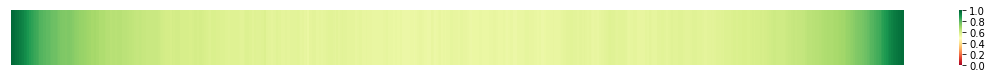

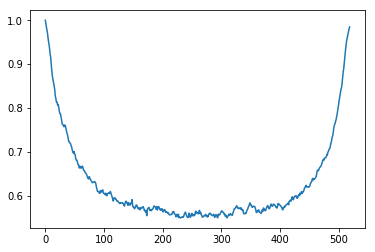

In [86]:
# total heat map

summed_scaled_data = np.sum(scaled_data2, axis=0)
summed_scaled_data = summed_scaled_data / max(summed_scaled_data)

fig, ax = plt.subplots(figsize=(20,1))
sns = seaborn.heatmap([summed_scaled_data], cmap="RdYlGn", square=False, vmin=0, vmax=1, xticklabels=False, yticklabels=False, cbar=True)
plt.show()


x = list(range(len(summed_scaled_data)))
plt.plot(x, summed_scaled_data)